In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg

In [2]:
image = mpimg.imread('369.png', 0 )
# print('image = {}'.format(image.shape))
s = image.shape
print('s = ',s)
# img=cv2.resize(image,(s[1]*4,s[0]*4),interpolation=cv2.INTER_CUBIC)
img = image

('s = ', (127, 201))


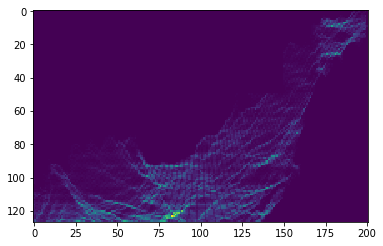

In [4]:
out_img = cv2.cvtColor(im_gray, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()

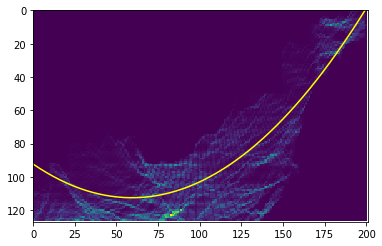

In [3]:
nonzero = img.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Fit a second order polynomial to each
line_fit = np.polyfit(nonzerox, nonzeroy, 2)

# Generate x and y values for plotting
plotx = np.linspace(0, img.shape[1]-1, img.shape[1] )
ploty = line_fit[0]*plotx**2 + line_fit[1]*plotx + line_fit[2]

# out_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
# out_img[np.int(ploty), np.int(plotx)] = [255, 255, 0]

# plt.imshow(out_img)
plt.imshow(img)
plt.plot(plotx, ploty, color='yellow')
plt.xlim(0, img.shape[1])
plt.ylim(img.shape[0], 0)
plt.savefig('analysis.png', bbox_inches = 'tight')
plt.show()

('mean_angle: ', 19.548682534142248)


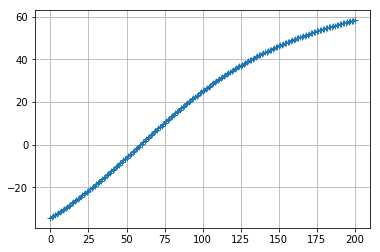

In [18]:
#  		   / nz 
#  		  /
#		 /
#		------> nx
# 		|
#		|
#		| ny

def compute_angle(nx):
    # float l = sqrt(n[0]*n[0] + n[2]*n[2]); 
    # (l <= 1e-5) return 0; 
    return np.arcsin(nx) * 180./np.pi

# gradient value 
gx = 2*line_fit[0]*plotx + line_fit[1]
yt = 1./np.sqrt(np.square(gx) + 1)
xt = -gx * yt
angle = compute_angle(xt)

mean_angle = np.mean(angle)
print('mean_angle: ', mean_angle)
# print('angle: ', angle)
plt.plot(angle, '+-')
plt.grid()
plt.savefig('theta.png')
plt.show()


In [101]:
# compare angle estimation by plane fitting and curve fitting
import sys

def estimate_angle_pipeline(image):
    # 1 fit curve 
    s = image.shape
    img=cv2.resize(image,(s[1]*4,s[0]*4),interpolation=cv2.INTER_CUBIC)
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Fit a second order polynomial to each
    line_fit = np.polyfit(nonzerox, nonzeroy, 2)
    
    # 2 compute gradient at each point 
    # Generate x and y values for plotting
    plotx = np.linspace(0, img.shape[1]-1, img.shape[1] )
    ploty = line_fit[0]*plotx**2 + line_fit[1]*plotx + line_fit[2]
    gx = 2*line_fit[0]*plotx + line_fit[1]
    
    # 3 estimate angle 
    # gradient value 
    yt = 1./np.sqrt(np.square(gx) + 1)
    xt = -gx * yt
    angle = compute_angle(xt)
    return np.mean(angle), (plotx, ploty), img
    
fresult = open('../result.log', 'r')
angle_plane = []
angle_curve = []
for line in fresult:
    item = line.split('\t')
    img_id = item[0]
    angle_plane.append(float(item[1]))
    
    # get image 
    fname = str(img_id) + '.png'
    image = mpimg.imread(fname)
    angle, _,_ = estimate_angle_pipeline(image)
    angle_curve.append(angle)
    

In [102]:
# print('angle_curve: {}'.format(angle_curve))
print angle_curve[0]

16.2988248995


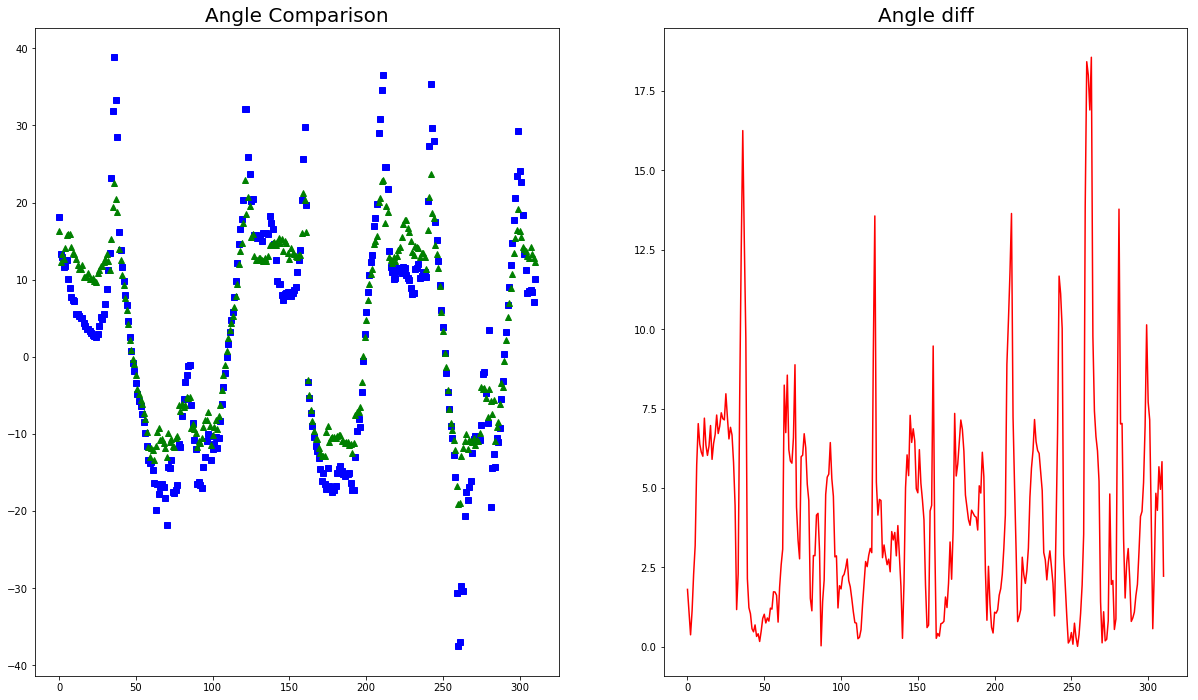

In [103]:
# plot the result

np_angle_p = np.array(angle_plane)
np_angle_c = np.array(angle_curve)

# angle_diff = [a1-a2 for (a1,a2) in zip(angle_plane, angle_curve)]
angle_diff = np.absolute(np_angle_p - np_angle_c)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))
ax1.set_title('Angle Comparison', fontsize = 20)

ax1.plot(np_angle_p, 'bs', np_angle_c, 'g^')

ax2.set_title('Angle diff', fontsize = 20)
ax2.plot(angle_diff, 'r-')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()



In [107]:
index = np.absolute(angle_diff) > 10
# print('index = {}'.format(index))
nonzero = index.nonzero()
print('nonzero: ',nonzero)

('nonzero: ', (array([ 35,  36,  37, 122, 209, 210, 211, 242, 243, 244, 259, 260, 261,
       262, 263, 281, 299]),))


In [105]:
fresult = open('../result.log', 'r')
imgs = []
for line in fresult:
    item = line.split('\t')
    img_id = item[0]
    imgs.append(img_id)
    


('nonzero[0:10]: ', array([ 35,  36,  37, 122, 209, 210, 211, 242, 243, 244]))
('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000076.png')
('top_view file: ', '76.png')
('angle_plane: ', 31.874489, ' angle_curve: ', 19.375944769697522)


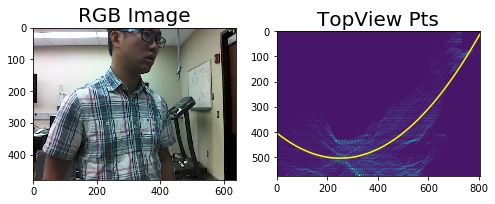

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000077.png')
('top_view file: ', '77.png')
('angle_plane: ', 38.836323, ' angle_curve: ', 22.580747166991259)


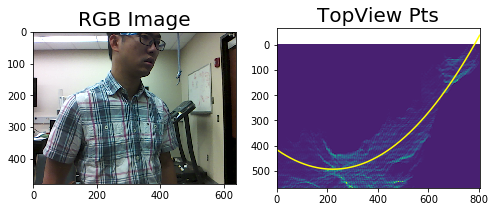

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000078.png')
('top_view file: ', '78.png')
('angle_plane: ', 33.267864, ' angle_curve: ', 20.504010386226888)


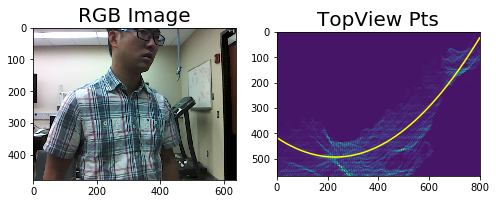

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000169.png')
('top_view file: ', '169.png')
('angle_plane: ', 32.076412, ' angle_curve: ', 18.509469018071368)


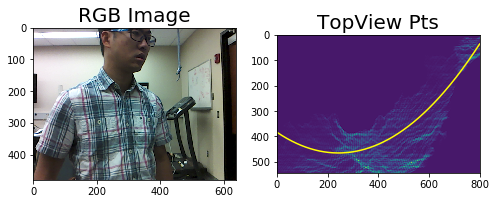

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000257.png')
('top_view file: ', '257.png')
('angle_plane: ', 30.809801, ' angle_curve: ', 20.548055548470245)


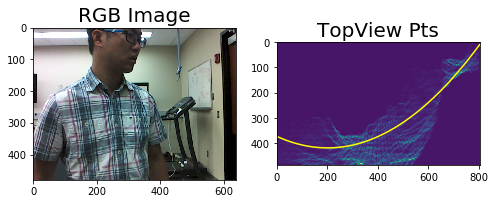

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000258.png')
('top_view file: ', '258.png')
('angle_plane: ', 34.551132, ' angle_curve: ', 22.778473422523202)


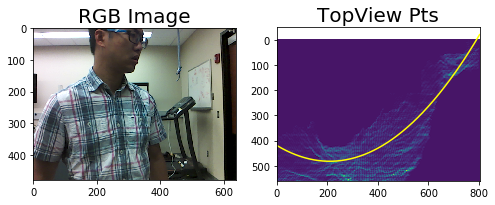

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000259.png')
('top_view file: ', '259.png')
('angle_plane: ', 36.549294, ' angle_curve: ', 22.905106821650456)


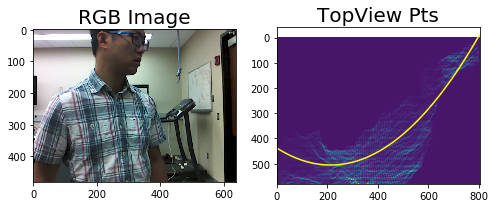

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000296.png')
('top_view file: ', '296.png')
('angle_plane: ', 35.424694, ' angle_curve: ', 23.752156340970451)


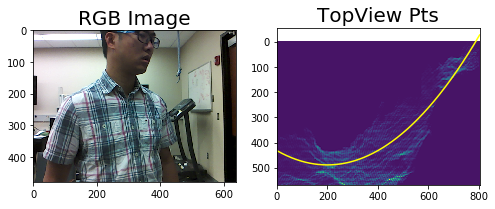

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000297.png')
('top_view file: ', '297.png')
('angle_plane: ', 29.723324, ' angle_curve: ', 18.605225419355307)


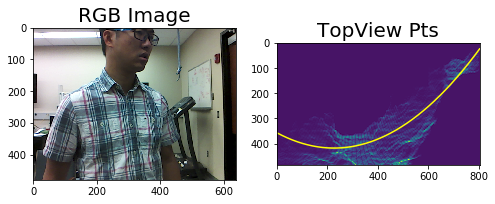

('rgb file: ', '/home/davidz/work/data/up/rollator/dataset1/color/000298.png')
('top_view file: ', '298.png')
('angle_plane: ', 28.025461, ' angle_curve: ', 18.005832372149943)


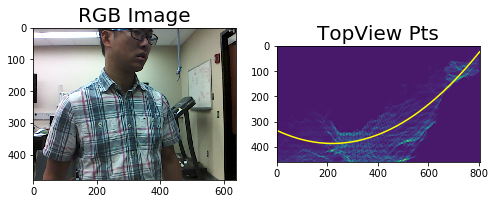

In [106]:
# imgs = [imgs[i] for i in nonzero[0:10]]
print('nonzero[0:10]: ', nonzero[0][:10])
ids = [imgs[i] for i in nonzero[0][:10]]
ags = [angle_plane[i] for i in nonzero[0][:10]]
fdir = '/home/davidz/work/data/up/rollator/dataset1/color'
for (i, angle) in zip(ids, ags):
    fname = str(i) + '.png'
    frgb = fdir + '/' + i.zfill(6) + '.png'
    rgb = mpimg.imread(frgb)
    image = mpimg.imread(fname)
    print('rgb file: ', frgb)
    print('top_view file: ', fname)
    angle_curve, (px, py), img = estimate_angle_pipeline(image)
    print('angle_plane: ', angle, ' angle_curve: ', angle_curve)
    
    # plot it 
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
    ax1.set_title('RGB Image', fontsize = 20)
    ax1.imshow(rgb)
    ax2.set_title('TopView Pts', fontsize = 20)
    ax2.imshow(img)
    ax2.plot(px, py, color='yellow')
    # ax2.xlim(0, img.shape[1])
    # ax2.ylim(img.shape[0], 0)
    # plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    plt.show()
    